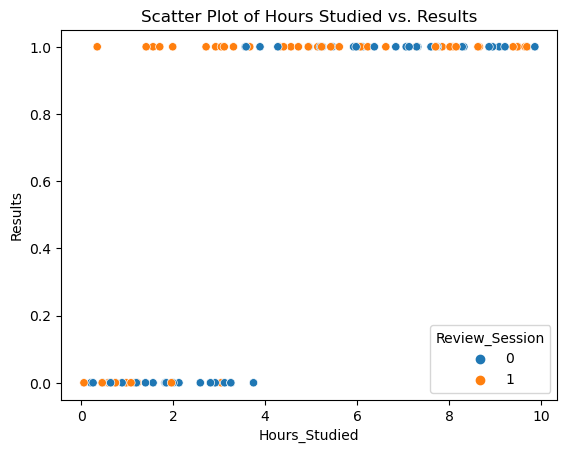

Coefficients: [1.40365599 1.42846816]
Intercept: -4.581361227356292
Accuracy: 0.85
ROC AUC: 0.8452380952380952


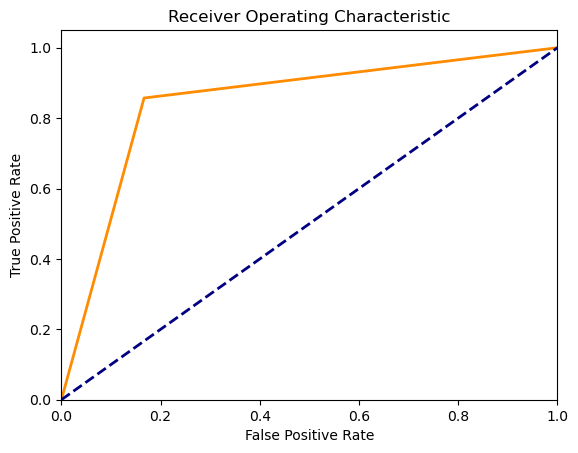

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Read data from a CSV file
df = pd.read_csv("student_data.csv") 

# Visualize the data
sns.scatterplot(x='Hours_Studied', y='Results', data=df, hue='Review_Session')
plt.title('Scatter Plot of Hours Studied vs. Results')
plt.show()

# Split the data into features (X) and the target (y) and perform train-test split
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Logistic Regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Get the model coefficients
coefficients = logistic_reg.coef_[0]
intercept = logistic_reg.intercept_[0]
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Make predictions on the test data
y_pred = logistic_reg.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Read data from a CSV file
data = pd.read_csv("student_data.csv")

# Split the data into features (X) and the target (y)
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit an SVM model with a linear kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Make predictions using the linear SVM
y_pred_linear = linear_svm.predict(X_test)

# Calculate accuracy for the linear SVM
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Linear SVM Accuracy:", accuracy_linear)

# Fit an SVM model with an RBF kernel using grid search for gamma
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10]}
rbf_svm = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
rbf_svm.fit(X_train, y_train)

# Make predictions using the best RBF SVM model
best_rbf_svm = rbf_svm.best_estimator_
y_pred_rbf = best_rbf_svm.predict(X_test)

# Calculate accuracy for the best RBF SVM
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
best_gamma = best_rbf_svm.gamma
print("Best RBF SVM Accuracy:", accuracy_rbf)
print("Best RBF SVM Gamma Parameter:", best_gamma)


Linear SVM Accuracy: 0.9
Best RBF SVM Accuracy: 0.9
Best RBF SVM Gamma Parameter: 1
